<a href="https://colab.research.google.com/github/parindapannoon/API-Copernicus/blob/main/ForecastAlbedoAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip3 install cdsapi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for cdsapi: filename=cdsapi-0.6.1-py2.py3-none-any.whl size=12021 sha256=371973bf82435a1ae172bc7611d565baaa358748159ad6a15244f70da34d5d85
  Stored in directory: /root/.cache/pip/wheels/4d/b6/82/16fe50c5ba1bc796d79375fabe24c0a5f99340d50fea2bc4bb
Successfully built cdsapi


In [3]:
#please register at the CDS registration page so you get a key
url = 'url: https://cds.climate.copernicus.eu/api/v2'
key= 'your-API key'

In [4]:
#get API request from the dataset
import cdsapi

c = cdsapi.Client(url = 'https://cds.climate.copernicus.eu/api/v2',
key= '190275:b8fd6953-5f28-4d39-a1b1-82f025b73e63')

c.retrieve(
    'reanalysis-era5-land-monthly-means',
    {
        'product_type': 'monthly_averaged_reanalysis',
        'variable': [
            'forecast_albedo', 'skin_temperature', 'total_precipitation',
        ],
        'year': [
            '1951', '1965', '1979',
            '1993', '2007', '2021',
        ],
        'month': '09',
        'time': '00:00',
        'format': 'grib',
    },
    '/content/download.grib')

2023-04-11 12:20:12,872 INFO Welcome to the CDS
INFO:cdsapi:Welcome to the CDS
2023-04-11 12:20:12,880 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-land-monthly-means
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-land-monthly-means
2023-04-11 12:20:13,237 INFO Request is completed
INFO:cdsapi:Request is completed
2023-04-11 12:20:13,244 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data5/adaptor.mars.internal-1681159646.7223015-2527-2-8c80a879-2c45-4023-bc62-53f48526d8d1.grib to /content/download.grib (102.5M)
INFO:cdsapi:Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data5/adaptor.mars.internal-1681159646.7223015-2527-2-8c80a879-2c45-4023-bc62-53f48526d8d1.grib to /content/download.grib (102.5M)
2023-04-11 12:20:21,843 INFO Download rate 11.9M/s
INFO:cdsapi:Download rate 11.9M/s


Result(content_length=107531280,content_type=application/x-grib,location=https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data5/adaptor.mars.internal-1681159646.7223015-2527-2-8c80a879-2c45-4023-bc62-53f48526d8d1.grib)

In [5]:
!pip install pygrib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 71.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 74.6 MB/s eta 0:00:00


In [7]:
#open and read the grib file
import pygrib
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

grib = 'adaptor.mars.internal-1681159646.7223015-2527-2-8c80a879-2c45-4023-bc62-53f48526d8d1.grib' # Set the file name of your input GRIB file
grbs = pygrib.open(grib)

<Figure size 1200x800 with 0 Axes>

In [8]:
#show lists of the data
for grb in grbs:
  print(grb)

1:Forecast albedo:(0 - 1) (avgid):regular_ll:surface:level 0:fcst time 1-24 hrs (avgid):from 195109010000
2:Skin temperature:K (avgua):regular_ll:surface:level 0:fcst time 0 hrs (avgua):from 195109010000
3:Total precipitation:m (avgas):regular_ll:surface:level 0:fcst time 24 hrs (avgas):from 195109010000
4:Forecast albedo:(0 - 1) (avgid):regular_ll:surface:level 0:fcst time 1-24 hrs (avgid):from 196509010000
5:Skin temperature:K (avgua):regular_ll:surface:level 0:fcst time 0 hrs (avgua):from 196509010000
6:Total precipitation:m (avgas):regular_ll:surface:level 0:fcst time 24 hrs (avgas):from 196509010000
7:Forecast albedo:(0 - 1) (avgid):regular_ll:surface:level 0:fcst time 1-24 hrs (avgid):from 197909010000
8:Skin temperature:K (avgua):regular_ll:surface:level 0:fcst time 0 hrs (avgua):from 197909010000
9:Total precipitation:m (avgas):regular_ll:surface:level 0:fcst time 24 hrs (avgas):from 197909010000
10:Forecast albedo:(0 - 1) (avgid):regular_ll:surface:level 0:fcst time 1-24 hrs (

In [ ]:
grb

18:Total precipitation:m (avgad):regular_ll:surface:level 0:fcst time 0-24 hrs (avgad):from 202109010000

In [9]:
# skin_alb = grbs.select(name='Forecast albedo')[0].values
# lats, lons = grbs.select(name='Forecast albedo')[0].latlons()
albedo_by_year = grbs.select(name = 'Forecast albedo')
albedo_by_year

[1:Forecast albedo:(0 - 1) (avgid):regular_ll:surface:level 0:fcst time 1-24 hrs (avgid):from 195109010000,
 4:Forecast albedo:(0 - 1) (avgid):regular_ll:surface:level 0:fcst time 1-24 hrs (avgid):from 196509010000,
 7:Forecast albedo:(0 - 1) (avgid):regular_ll:surface:level 0:fcst time 1-24 hrs (avgid):from 197909010000,
 10:Forecast albedo:(0 - 1) (avgid):regular_ll:surface:level 0:fcst time 1-24 hrs (avgid):from 199309010000,
 13:Forecast albedo:(0 - 1) (avgid):regular_ll:surface:level 0:fcst time 1-24 hrs (avgid):from 200709010000,
 16:Forecast albedo:(0 - 1) (avgid):regular_ll:surface:level 0:fcst time 1-24 hrs (avgid):from 202109010000]

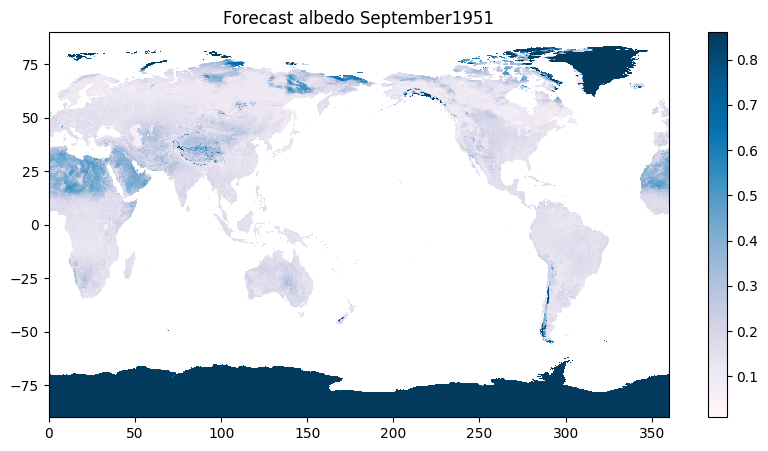

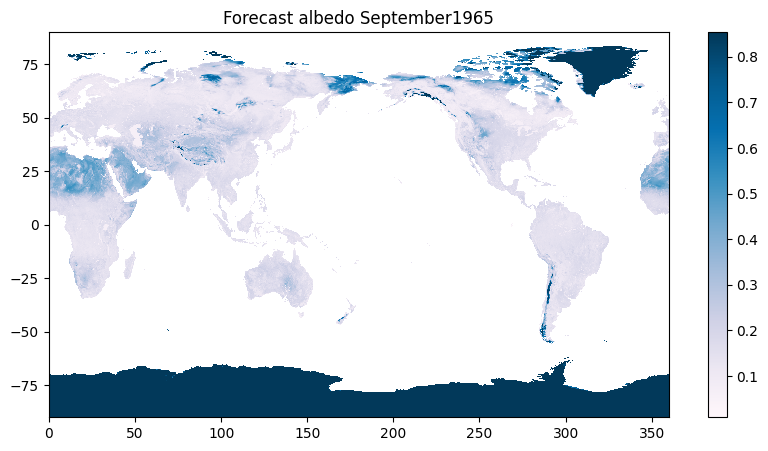

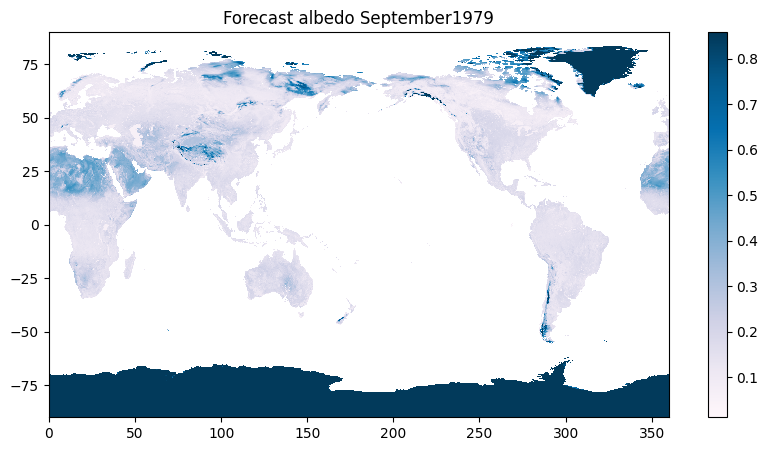

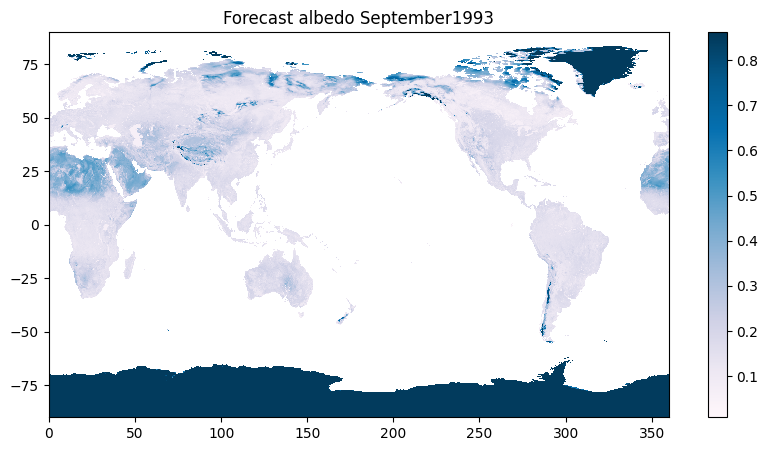

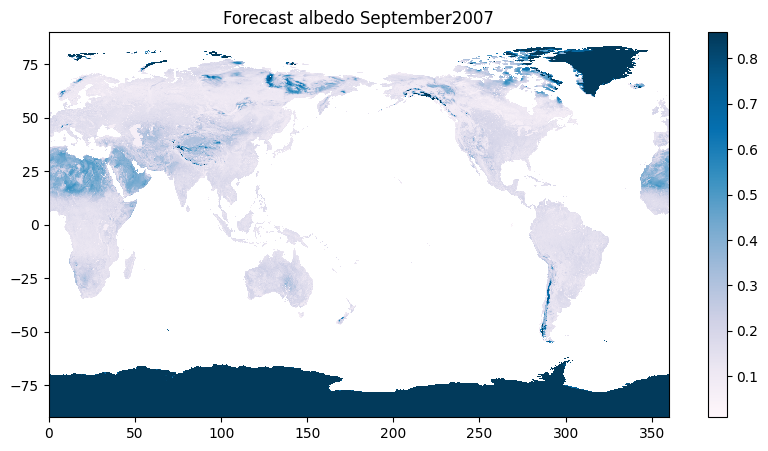

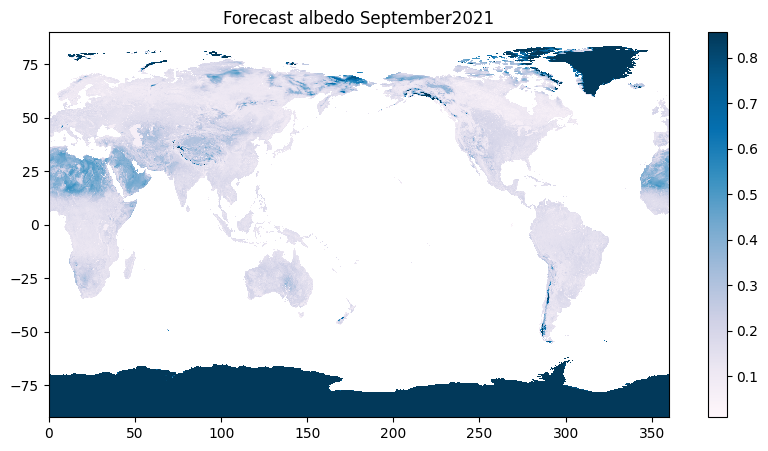

In [10]:
for alb in albedo_by_year:
  year = alb.dataDate//10**4
  skin_alb = alb.values
  lats, lons = alb.latlons()
  plt.figure(figsize=(10, 5))
  plt.pcolormesh(lons,lats,skin_alb, cmap=plt.cm.PuBu)

  # Visualize colorbar and title
  plt.colorbar()
  plt.title(f"Forecast albedo September{str(year)}")

  # Show the plot
  plt.show()